In [97]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
#visualisation and correlation
import matplotlib.pyplot as plt
#testing
from sklearn.model_selection import train_test_split
#transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
#pipeline for the transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#models to predict probability of having diabet 1, 2, 3 
#classifiers in machine_learning
from sklearn.neighbors import KNeighborsClassifier
#--> after analysis size of data set allows the use of a deep learning model
from keras import Sequential, Input, layers

In [15]:
df=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [89]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [90]:
df.query('Diabetes_012==0')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0


In [95]:
df.query('Diabetes_012>0')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,2.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,2.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253666,1.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,15.0,0.0,0.0,6.0,5.0,2.0
253668,2.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [105]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [151]:
df.query('Diabetes_012>0')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,2.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,2.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253666,1.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,15.0,0.0,0.0,6.0,5.0,2.0
253668,2.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [153]:
df.groupby('Diabetes_012')['HeartDiseaseorAttack'].sum().to_frame()

,HeartDiseaseorAttack
Diabetes_012,
0.0,15351.0
1.0,664.0
2.0,7878.0


In [103]:
print(f'pourcentage de chance davoir un type de diabete 0 (pas de diabète), 1, (type1), 2 (type2): {round(((15351/23893.)*100),2)}% and {round(((664.0/23893.0)*100),2)}% and {round(((7878.0/23893.0)*100),2)}%')

pourcentage de chance davoir un type de diabete 0 (pas de diabète), 1, (type1), 2 (type2): 64.25% and 2.78% and 32.97%


In [107]:
X = df[['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]



In [108]:
# Calculer la matrice de corrélation
corr_matrix = X.corr()



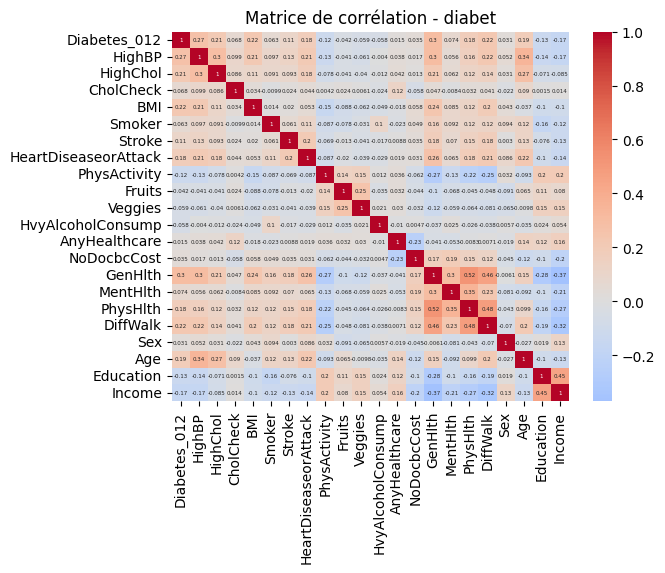

In [112]:
# Afficher avec seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 4})
plt.title("Matrice de corrélation - diabet")
plt.show()



In [154]:
#we can identify with this correlation matrix that diabet is correlated mostly to  HighBP, HighChol, 
#BMI, Heartdiseaseorattack previously, mental health, physical health, difficulty to walk and age
df.columns


Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [117]:
['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth','MentHlth', 'PhysHlth', 'DiffWalk', 'Age']

['HighBP',
 'HighChol',
 'BMI',
 'HeartDiseaseorAttack',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Age']

In [17]:
#we have binary and non binary datas. Scaling will be compulsory and there are no object. Let have a look at the 1) columns to avoid any missing 2) at the distribution


array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'c

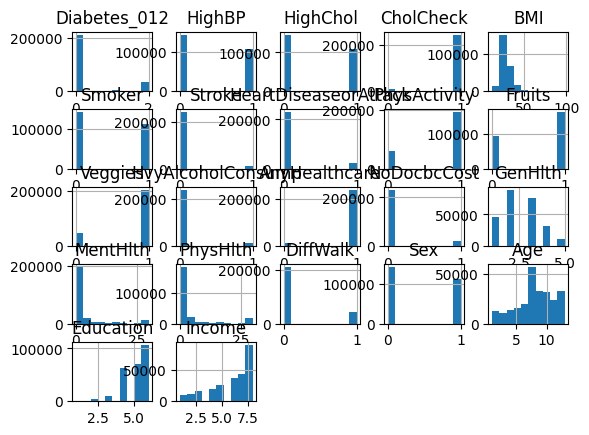

In [156]:
df.hist()

In [19]:
#our data are not gaussian, there are outliers therefore min max or robust should be chosen. 
#I need to investigate data are there continuous values or discrete and binary non binary ?

In [157]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [180]:
df.head(1)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0


<Axes: xlabel='HighBP', ylabel='Count'>

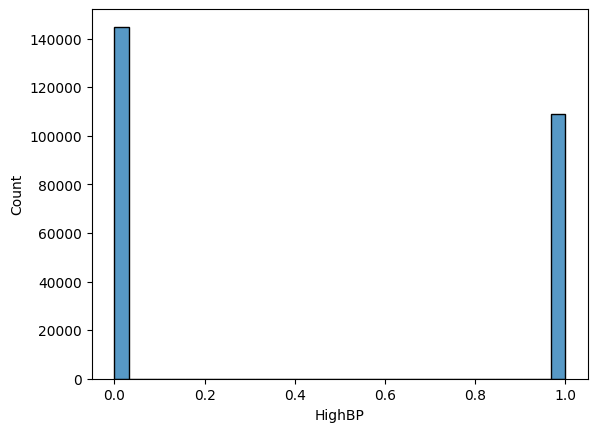

In [158]:
sns.histplot(data=df, x='HighBP')

In [171]:
x=df.drop(columns=['Diabetes_012'])
y=df['Diabetes_012']
x

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [27]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [28]:
#after verification there are no missing values. Data set is superclean

In [29]:
#we will need to scale everything on the same basis. here simple imputer will be no necessary but anyway...

In [160]:
df.shape

(253680, 22)

In [34]:
# We have enough data for using deep learning

In [161]:
numerical_cat=Pipeline([
    ('imput',SimpleImputer(strategy='most_frequent')),
    ('scale',MinMaxScaler(feature_range=(0, 1)))
])
numerical_cat

Pipeline(steps=[('imput', SimpleImputer(strategy='most_frequent')),
                ('scale', MinMaxScaler())])

In [162]:
#application du pipeline
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns. tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num_cat', numerical_cat, numerical_cols)
    ],
    remainder='passthrough'
)

x_transformed = preprocessor. fit_transform(x)
x_transformed

array([[1.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        0.28571429],
       [0.        , 0.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.08333333, 0.8       ,
        0.14285714],
       [1.        , 0.        , 1.        , ..., 0.5       , 0.8       ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 1.        ,
        0.14285714]])

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.3, random_state=42)

In [199]:
print(x_train.shape)

(177576, 21)


In [203]:
print(x_train[:5])

[[1.         1.         1.         0.26744186 0.         0.
  0.         1.         1.         1.         0.         1.
  0.         1.         0.         0.46666667 1.         0.
  0.91666667 0.4        0.        ]
 [1.         1.         1.         0.29069767 1.         0.
  0.         1.         1.         1.         0.         1.
  0.         0.5        0.         0.06666667 0.         1.
  0.83333333 0.8        0.28571429]
 [0.         0.         1.         0.18604651 0.         0.
  0.         1.         1.         1.         0.         1.
  0.         0.25       0.         0.         0.         0.
  0.33333333 1.         1.        ]
 [0.         0.         1.         0.12790698 0.         0.
  0.         1.         1.         1.         0.         1.
  0.         0.5        0.         0.         0.         1.
  0.08333333 1.         1.        ]
 [0.         0.         1.         0.20930233 1.         0.
  0.         1.         0.         1.         0.         1.
  0.         0.2

In [204]:
print(f"Min values: {x_train.min(axis=0)}")
print(f"Max values: {x_train.max(axis=0)}")

Min values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [186]:
x_train.shape

(177576, 21)

In [184]:
y_train.value_counts()

Diabetes_012
0.0    149523
2.0     24847
1.0      3206
Name: count, dtype: int64

In [205]:
model=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [206]:
y_pred = model.predict(x_test)
# 3. Évaluer la performance
score = model.score(x_test, y_test)
print(f"Accuracy: {score}")

# Optionnel:  obtenir les probabilités
y_proba = model.predict_proba(x_test)


Accuracy: 0.8284321454851257


In [73]:
#our model identifies similarities among people whom have no diabet (0), or type1 or type2. It is accurate at more than 82%

In [ ]:
# ['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth','MentHlth', 'PhysHlth', 'DiffWalk', 'Age']

In [149]:
df['Age'].min()

1.0

In [212]:
# 1. Créer new_datapoint avec des VALEURS BRUTES (comme dans ton df original)
new_datapoint = pd.DataFrame({
    'HighBP':    [1],
    'HighChol':   [1],
    'CholCheck': [1],
    'BMI':  [20],  # ← Valeur BRUTE
    'Smoker':  [1],
    'Stroke':  [1],
    'HeartDiseaseorAttack': [1],
    'PhysActivity': [0],
    'Fruits': [0],
    'Veggies': [0],
    'HvyAlcoholConsump': [1],
    'AnyHealthcare': [1],
    'NoDocbcCost':    [0],
    'GenHlth': [5],  # ← Valeur BRUTE
    'MentHlth': [18],  # ← Valeur BRUTE
    'PhysHlth': [15],  # ← Valeur BRUTE
    'DiffWalk': [1],
    'Sex':    [1],
    'Age':   [70],  # ← Valeur BRUTE
    'Education': [4],
    'Income': [3]})

# 2. TRANSFORMER avec le preprocessor (CRUCIAL !)
new_datapoint_scaled = preprocessor.transform(new_datapoint)

# 3. Prédire avec les données scalées
prediction = model.predict(new_datapoint_scaled)
proba = model.predict_proba(new_datapoint_scaled)

print(f"Prédiction:  {prediction}")
print(f"Probabilités: {proba}")

Prédiction:  [0.]
Probabilités: [[0.6 0.  0.4]]


In [43]:
model = Sequential()

model.add(Input(shape=(2,))) # Input layer with 2 features

model.add(layers.Dense(5, activation='relu')) # 1st hidden layer with 5 neurons
model.add(layers.Dense(4, activation='relu')) # 2nd hidden layer with 4 neurons
model.add(layers.Dense(3, activation='relu')) # 3rd hidden layer with 3 neurons

model.add(layers.Dense(1, activation='linear')) # Output layer that outputs a probability of belonging
                                                 # to the class of "success"